# Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

In [39]:
from sklearn.pipeline import Pipeline

# Loading Data

In [133]:
df = pd.read_csv('car_purchasing_data.csv', encoding='latin')

In [134]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# Discovering Data

In [136]:
# missing values
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [137]:
df['Country'].value_counts()    

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: Country, Length: 211, dtype: int64

In [138]:
df['Gender'].value_counts()

1    253
0    247
Name: Gender, dtype: int64

In [139]:
df.sample()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
233,Kyle R. Kaufman,Morbi.vehicula@mattis.org,Israel,1,53.141192,70842.83518,9536.899689,545946.9996,58235.41454


In [140]:
df = df.drop(['Customer Name', 'Customer e-mail'],axis=1)

## Type converting

In [141]:
df['Age'] = df['Age'].astype(int)

C:\Users\engmi\AppData\Local\Temp\ipykernel_9000\74495684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

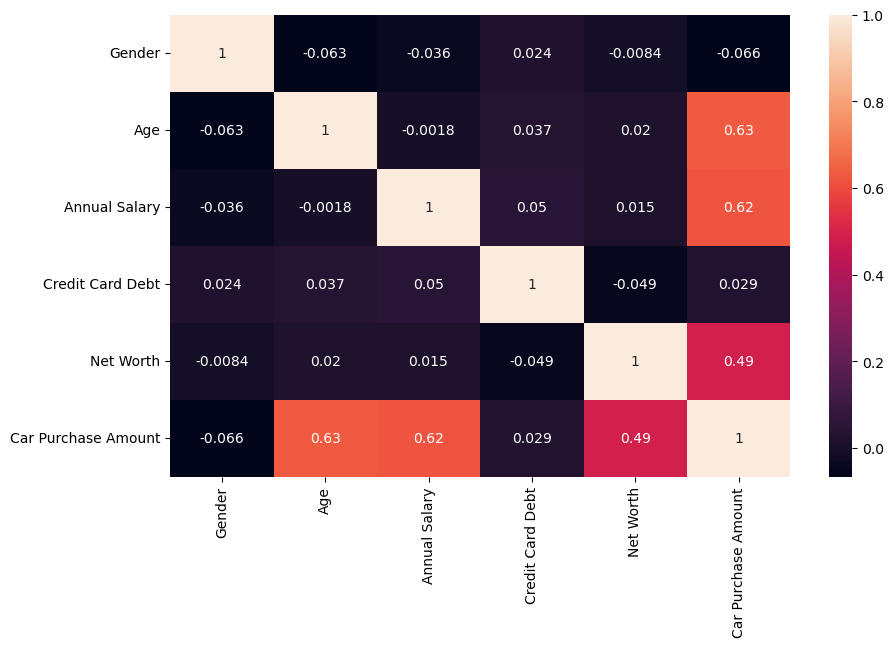

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

## Outliers

<Axes: >

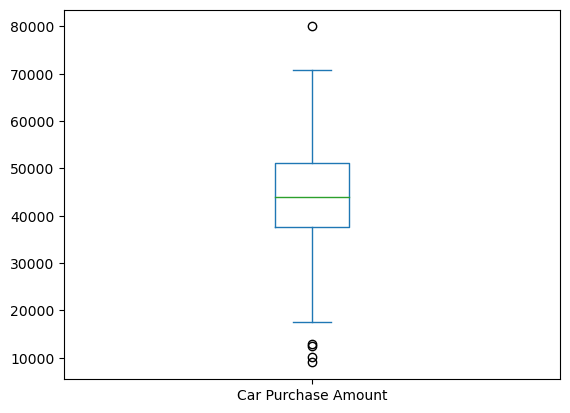

In [143]:
df['Car Purchase Amount'].plot.box()

<Axes: >

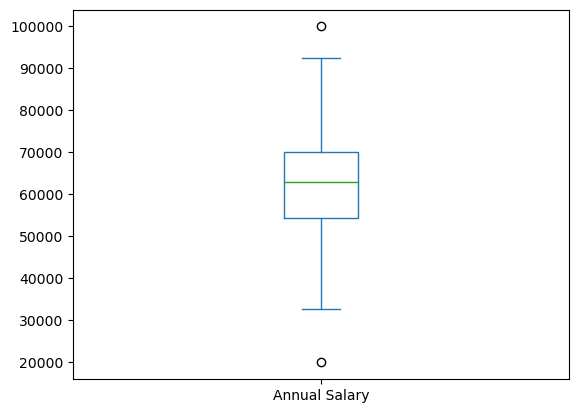

In [144]:
df['Annual Salary'].plot.box()

<Axes: >

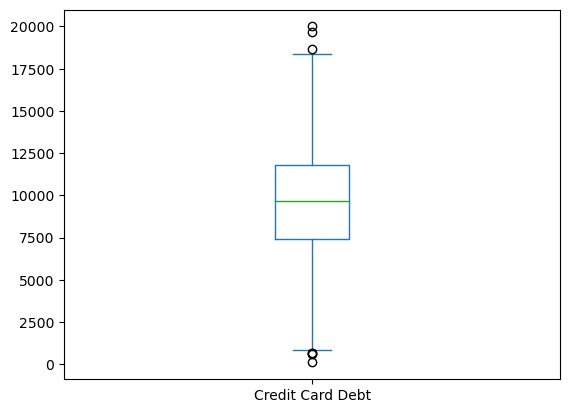

In [145]:
df['Credit Card Debt'].plot.box()

<Axes: >

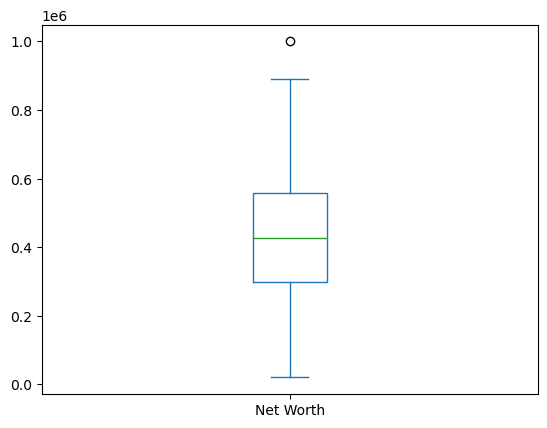

In [146]:
df['Net Worth'].plot.box()

<Axes: >

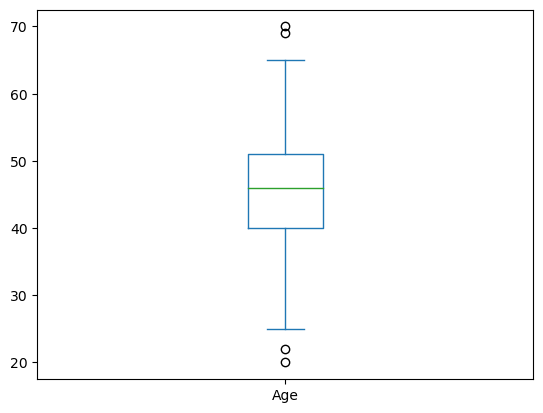

In [147]:
df['Age'].plot.box()

## Scaling

In [148]:
sc = StandardScaler()
df['Annual Salary_sc'] = sc.fit_transform(df[['Annual Salary']])
df['Credit Card Debt_sc'] = sc.fit_transform(df[['Credit Card Debt']])
df['Net Worth_sc'] = sc.fit_transform(df[['Net Worth']])
df['Car Purchase Amount_sc'] = sc.fit_transform(df[['Car Purchase Amount']])
df['Age_sc'] = sc.fit_transform(df[['Age']])

In [149]:
df.sample()

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Annual Salary_sc,Credit Card Debt_sc,Net Worth_sc,Car Purchase Amount_sc,Age_sc
166,Kuwait,1,36,52477.66494,12071.41684,97706.89181,20653.21409,-0.825338,0.706823,-1.925258,-2.188785,-1.224711


## Dropping unimportant columns

In [150]:
df = df.drop(['Country', 'Annual Salary','Age',
              'Credit Card Debt', 'Net Worth'], axis=1)

In [151]:
df.sample()

,Gender,Car Purchase Amount,Annual Salary_sc,Credit Card Debt_sc,Net Worth_sc,Car Purchase Amount_sc,Age_sc
55,0,48100.29052,-0.830018,-0.748539,0.038024,0.361489,1.406651


# Spliting Data

In [152]:
X = df[['Gender', 'Age_sc' , 'Annual Salary_sc', 'Credit Card Debt_sc', 'Net Worth_sc']]
y = df['Car Purchase Amount']

In [153]:
X.shape

(500, 5)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(400, 5)
(100, 5)


In [155]:
# Initialize the estimators
reg1 = LinearRegression()
reg2 = Lasso()
reg3 = LogisticRegression()
reg4 = Ridge()
reg5 = GradientBoostingRegressor()
reg6 = RandomForestRegressor()
reg7 = SVR()
reg8 = KNeighborsRegressor()


In [156]:
# Initialize the hyperparameters for each dictionary
param1 = {}
param1['regressor'] = [reg1]

param2 = {}
param2['regressor'] = [reg2]
param2['regressor__alpha'] = [0.1, 0.01, 0.001]

param3 = {}
param3['regressor'] = [reg3]
param3['regressor__C'] = [1.0, 10, 100]

param4 = {}
param4['regressor'] = [reg4]
param4['regressor__alpha'] = [0.1, 0.01, 0.001]

param5 = {}
param5['regressor'] = [reg5]
param5['regressor__alpha'] = [0.1, 0.5, 0.9, 1, 10]
param5['regressor__n_estimators'] = [10, 100, 1000]
param5['regressor__learning_rate'] = [0.1, 0.01, 0.001]
param5['regressor__learning_rate'] = [0.1, 0.01, 0.001]
param5['regressor__criterion'] = ['friedman_mse', 'squared_error']

param6 = {}
param6['regressor'] = [reg6]
param6['regressor__n_estimators'] = [10, 100, 1000]
param6['regressor__criterion'] = ["squared_error", "absolute_error", "friedman_mse", "poisson"]

param7 = {}
param7['regressor'] = [reg7]
param7['regressor__C'] = [1.0, 10, 100]
param7['regressor__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

param8 = {}
param8['regressor'] = [reg8]
param8['regressor__n_neighbors'] = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [157]:
pipeline = Pipeline([('regressor', reg1)])
params = [param2, param3, param4, param5, param6, param7, param8]


# Randomized Search CV

In [158]:
%%time
# Train the random search model
rs = RandomizedSearchCV(pipeline, params, cv=3, scoring='r2').fit(X_train, y_train)

C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(X

CPU times: total: 21.7 s
Wall time: 24 s


In [159]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

{'regressor__n_estimators': 1000,
 'regressor__learning_rate': 0.1,
 'regressor__criterion': 'friedman_mse',
 'regressor__alpha': 0.9,
 'regressor': GradientBoostingRegressor()}

In [160]:
# r2 score for the best model
rs.best_score_

0.9637956645726091

# The best Model

In [161]:
model = GradientBoostingRegressor(alpha=0.9,criterion= 'friedman_mse', learning_rate= 0.1, n_estimators= 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [162]:
r2_score(y_test, y_pred)

0.9800244878300305

In [163]:
mean_squared_error(y_test, y_pred)

2156819.161913407

# Save the model

In [164]:
import joblib

In [165]:
joblib.dump(model, 'car_purchasing_model.p')

['car_purchasing_model.p']

In [166]:
car_purchasing_model = joblib.load('car_purchasing_model.p')

In [169]:
car_purchasing_model.predict([[1,sc.fit_transform([[58.27]]), sc.fit_transform([[79370.04]]), sc.fit_transform([[14426.16]]), sc.fit_transform([[548599.05]])]])


C:\Users\engmi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 5) + inhomogeneous part.